In [1]:
from netCDF4 import Dataset
import pandas as pd
import numpy as np
import matplotlib as mpl
import copy

import os, sys
import pickle as pkl
from scipy import interpolate
import scipy as sp

sys.path.append(r"C:\Users\mikek\OneDrive\Project\DLS\DLS-git")
from LRBv21 import LRBv21
from AnalyticCoolingCurves import *
from unpackConfigurationsMK import *
from refineGrid import refineGrid
from Morph import Profile, Morph

onedrive_path = onedrive_path = str(os.getcwd()).split("OneDrive")[0] + "OneDrive"
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\sdtools"))

from DLS.postprocess import *

from code_comparison.solps_pp import *
import general.plotstyle

%matplotlib inline

%load_ext autoreload
%autoreload 2


# Read balance file

In [2]:
balance_path = r"C:\Users\mikek\OneDrive\Project\DLS\from_stuart\2023-07-11 - SPR45 balance file\balance.nc"
eqb = dict()
eqb["SPR45"] = dict()

for side in ["il", "ol", "iu", "ou"]: # Inner lower, outer lower.
    eqb["SPR45"][side] = unpackConfigurationMK(File = balance_path, Type = side, sepadd=0, resolution = 2000)
    
    keys = list(eqb["SPR45"][side].keys())
    for key in keys:
        
        if key not in ["Bpol", "Btot", "Xpoint", "Spol", "S", "R", "Z"]:
            eqb["SPR45"][side].pop(key, None)
        
# file_write(eqb, "equilibrium.pkl")

In [3]:
%matplotlib inline
plt.close("all")

# Morphs

In [4]:
allprofiles = {}

## Move in

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


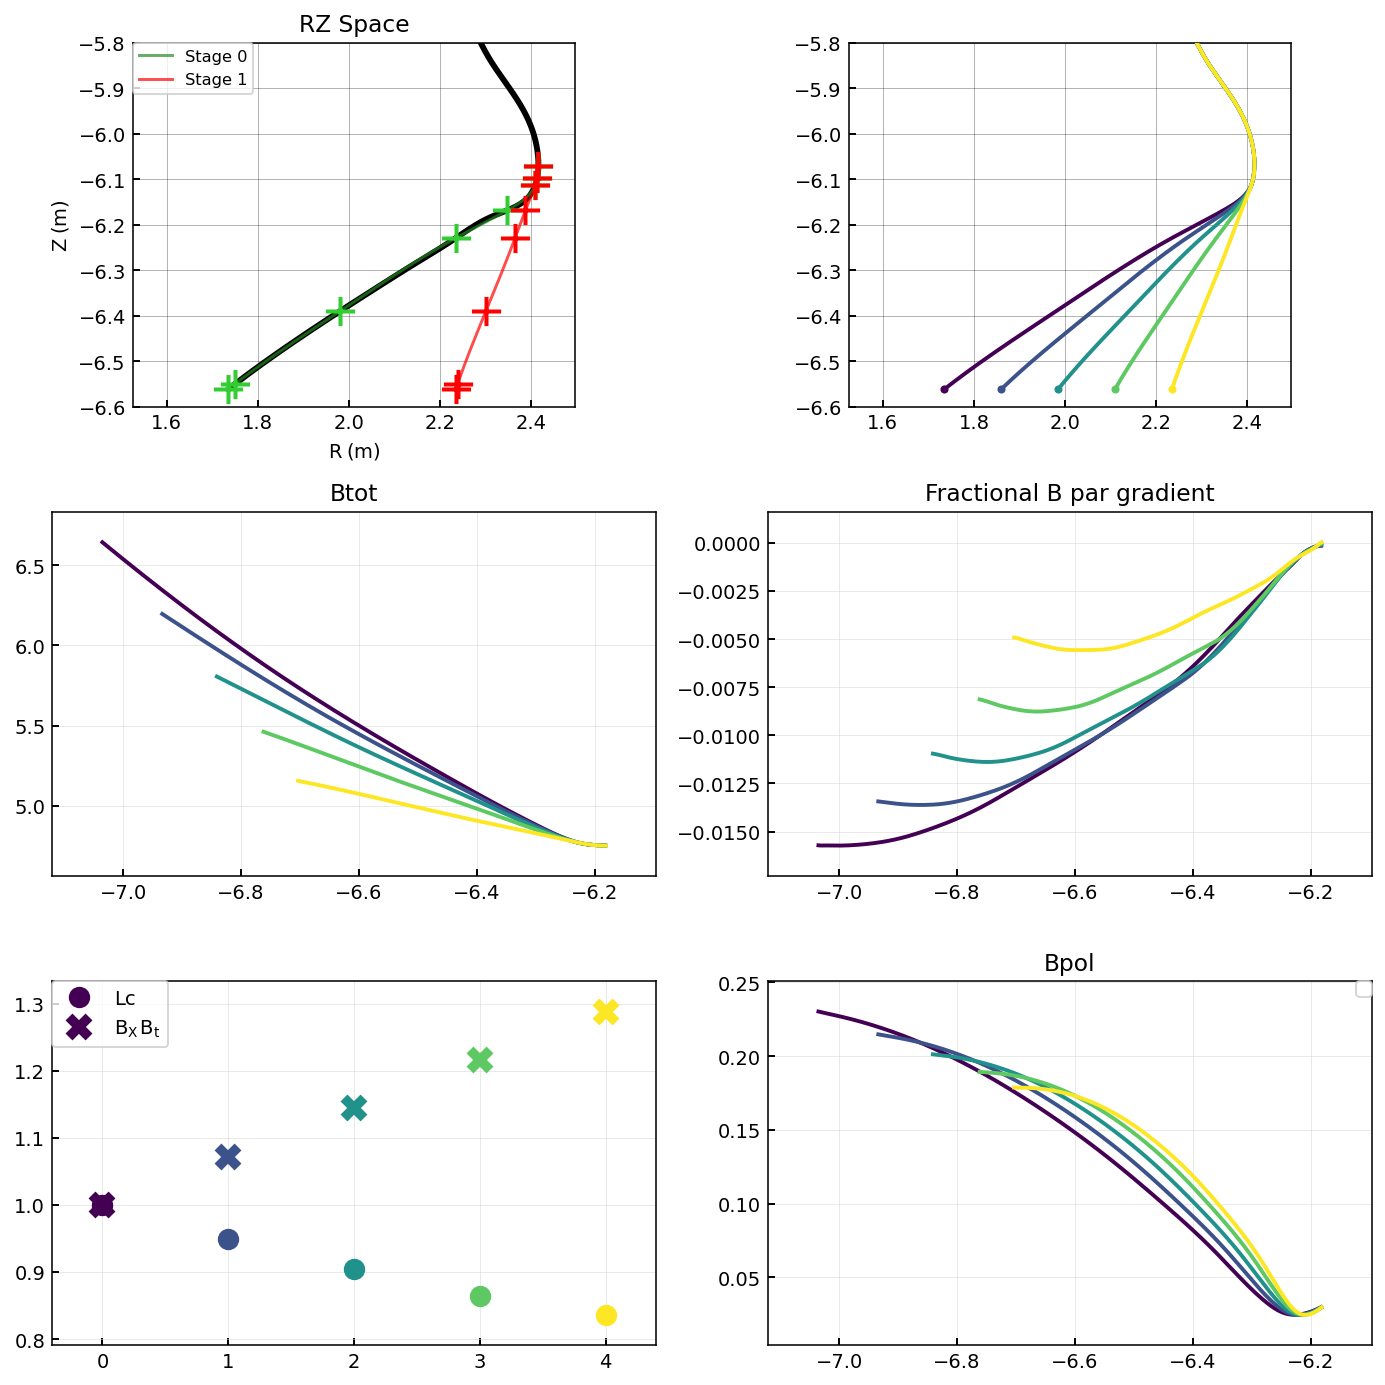

In [5]:
plt.close("all")
d = eqb["SPR45"]["il"]
base = Profile(d["R"], d["Z"], d["Xpoint"], d["Btot"], d["Bpol"], d["S"], d["Spol"])
base_offsets = [
    {"pos" : 1},
    {"pos" : 0.97},
    {"pos" : 0.95},
    {"pos" : 0.85},
    {"pos" : 0.7},
    {"pos" : 0.35},
    {"pos" : 0.02},
    {"pos" : 0.0},
    ]

offsets_stage1 = [
    {"pos" : 1,     "offsety": 0},
    {"pos" : 0.97,  "offsety": 0},
    {"pos" : 0.95,  "offsety": 0},
    {"pos" : 0.85,  "offsety": 0, "offsetx": 0.04},
    {"pos" : 0.7,   "offsety": 0, "offsetx": 0.13},
    {"pos" : 0.35,  "offsety": 0, "offsetx": 0.32},
    {"pos" : 0.02,  "offsety": 0, "offsetx": 0.49},
    {"pos" : 0.0,   "offsety": 0, "offsetx": 0.5},
    ]


# Make stage 0 by copying the base profile
stage0 = base.copy()
stage0.offset_control_points(base_offsets)
stage0.name = "Stage 0"

# Make stage 1 by offsetting stage 0
stage1 = base.copy()
stage1.offset_control_points(offsets_stage1)
stage1.recalculate_topology()
stage1.name = "Stage 1"

profiles = {}
for i in np.linspace(0,1,5):
    profiles[i] = base.copy()
    profiles[i].offset_control_points(offsets_stage1, factor = i)
    profiles[i].recalculate_topology()
    profiles[i].name = i
    
plot_profiles(base, [stage0, stage1], profiles, ylims=(-6.6, -5.8), reverse_S = False)

allprofiles["move_in"] = copy.deepcopy(profiles)

C:\Users\mikek\AppData\Local\Temp\ipykernel_28016\713503594.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = [plt.cm.get_cmap("viridis", 5)(x) for x in range(5)]


Text(0, 0.5, 'Z [m]')

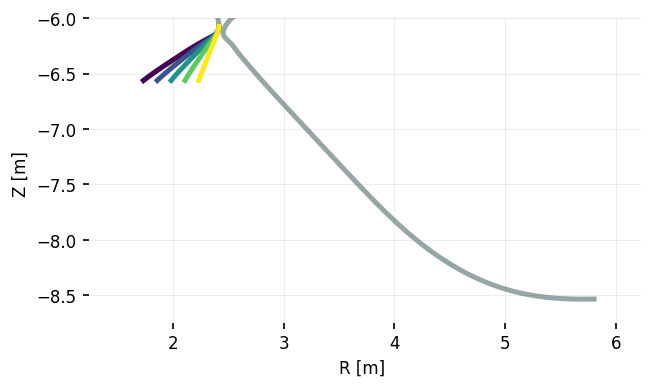

In [40]:
profiles = allprofiles["move_in"]

colors = [plt.cm.get_cmap("viridis", 5)(x) for x in range(5)]
self = plotProfiles(profiles, basis = "Spol", side = "inner", colors = colors)

ylims = (-8.8, -6)
eqbchoice = eqb["SPR45"]

fig, ax = plt.subplots()

for side in ["il", "ol"]:
    ax.plot(eqbchoice[side]["R"], eqbchoice[side]["Z"], c = "darkslategrey", alpha = 0.5, lw = 3)
    
for i, key in enumerate(profiles.keys()):
    p = profiles[key]
    ax.plot(p["R"][:p["Xpoint"]], p["Z"][:p["Xpoint"]], color = self.colors[i], lw = self.lw)
            
ax.set_aspect("equal")
ax.yaxis.margin = 0
ax.spines["bottom"].set_visible(False)
ax.autoscale()

if ylims != (None, None):
    ax.set_ylim(ylims)
else:
    ax.set_ylim(None, -6.0)
    
ax.set_xlabel("R [m]")
ax.set_ylabel("Z [m]")


## Move down

In [90]:
%matplotlib inline

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


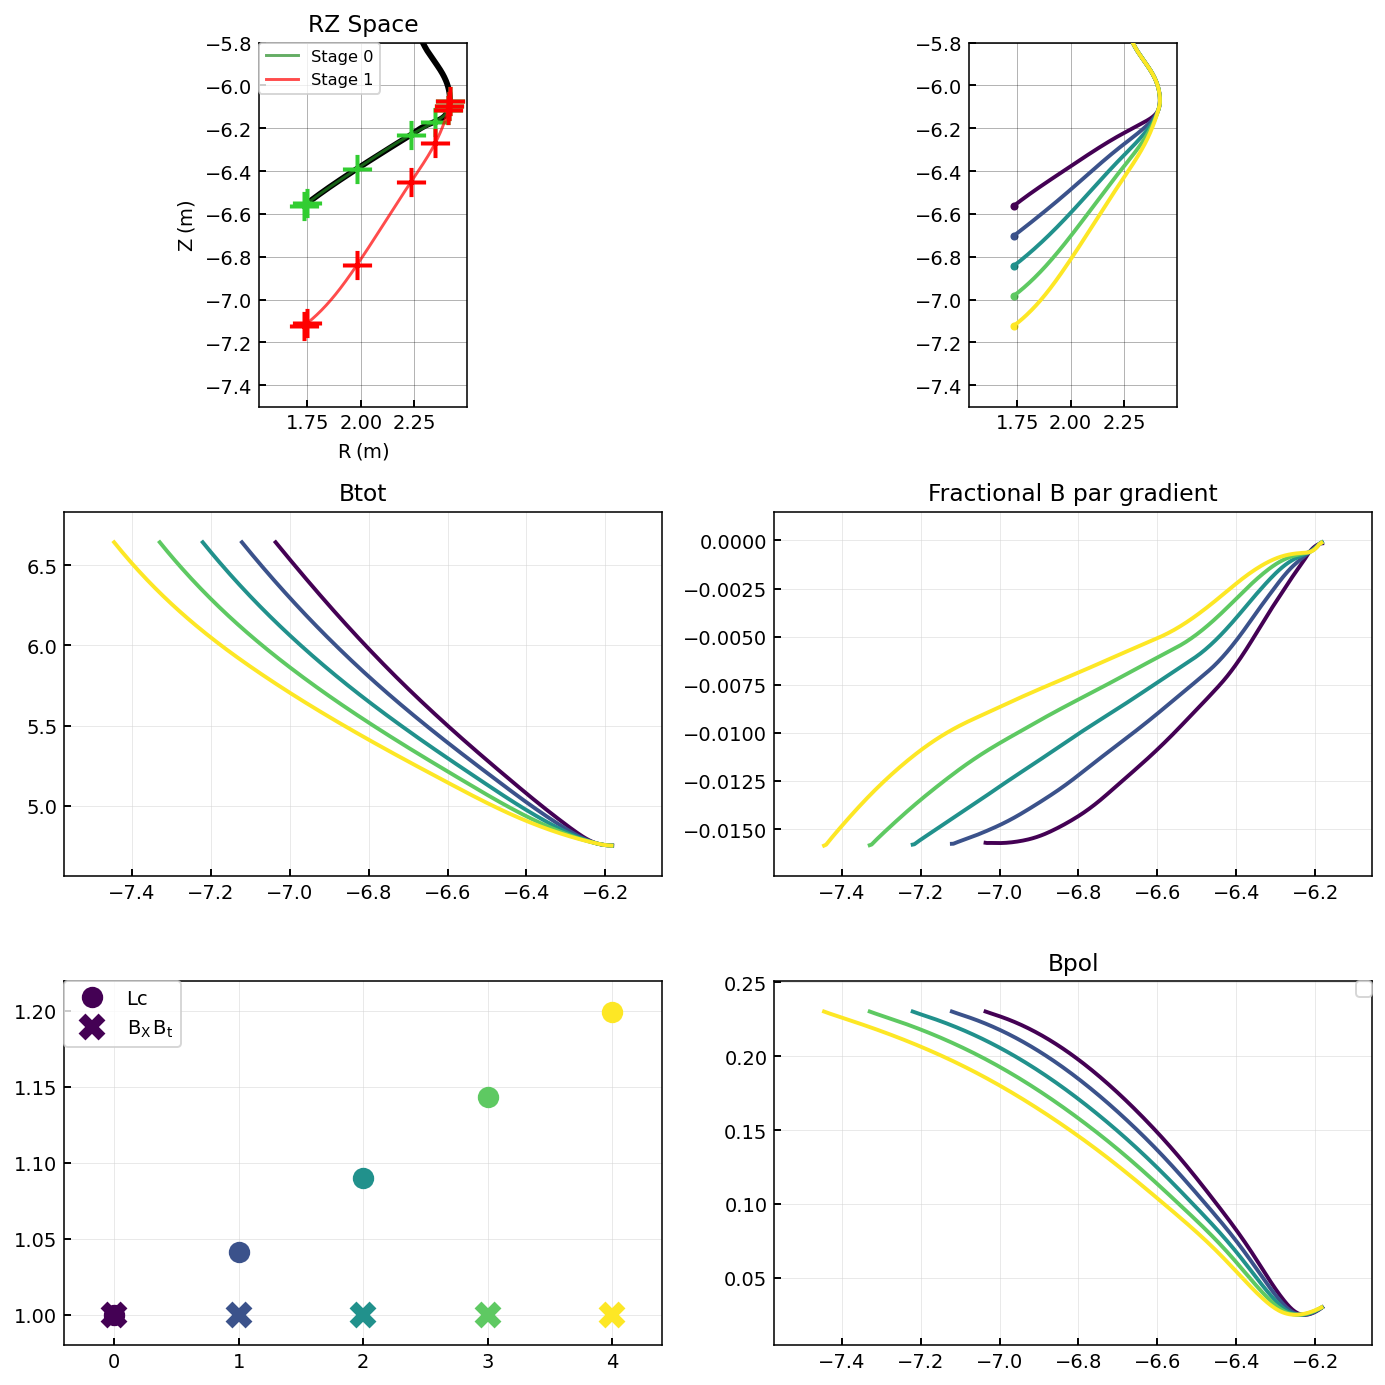

In [6]:
plt.close("all")
d = eqb["SPR45"]["il"]
base = Profile(d["R"], d["Z"], d["Xpoint"], d["Btot"], d["Bpol"], d["S"], d["Spol"])
base_offsets = [
    {"pos" : 1},
    {"pos" : 0.97},
    {"pos" : 0.95},
    {"pos" : 0.85},
    {"pos" : 0.7},
    {"pos" : 0.35},
    {"pos" : 0.02},
    {"pos" : 0.0},
    ]

offsets_stage1 = [
    {"pos" : 1,     "offsety": 0},
    {"pos" : 0.97,  "offsety": 0},
    {"pos" : 0.95,  "offsety": 0},
    {"pos" : 0.85,  "offsety": -0.1, "offsetx": 0},
    {"pos" : 0.7,   "offsety": -0.22, "offsetx": 0},
    {"pos" : 0.35,  "offsety": -0.45, "offsetx": 0},
    {"pos" : 0.02,  "offsety": -0.56, "offsetx": 0},
    {"pos" : 0.0,   "offsety": -0.56, "offsetx": 0},
    ]


# Make stage 0 by copying the base profile
stage0 = base.copy()
stage0.offset_control_points(base_offsets)
stage0.name = "Stage 0"

# Make stage 1 by offsetting stage 0
stage1 = base.copy()
stage1.offset_control_points(offsets_stage1)
stage1.recalculate_topology()
stage1.name = "Stage 1"

profiles = {}
for i in np.linspace(0,1,5):
    profiles[i] = base.copy()
    profiles[i].offset_control_points(offsets_stage1, factor = i)
    profiles[i].recalculate_topology()
    profiles[i].name = i
    
plot_profiles(base, [stage0, stage1], profiles, ylims=(-7.5, -5.8), reverse_S = False)

allprofiles["move_down"] = copy.deepcopy(profiles)

## Add poloidal flux expansion

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


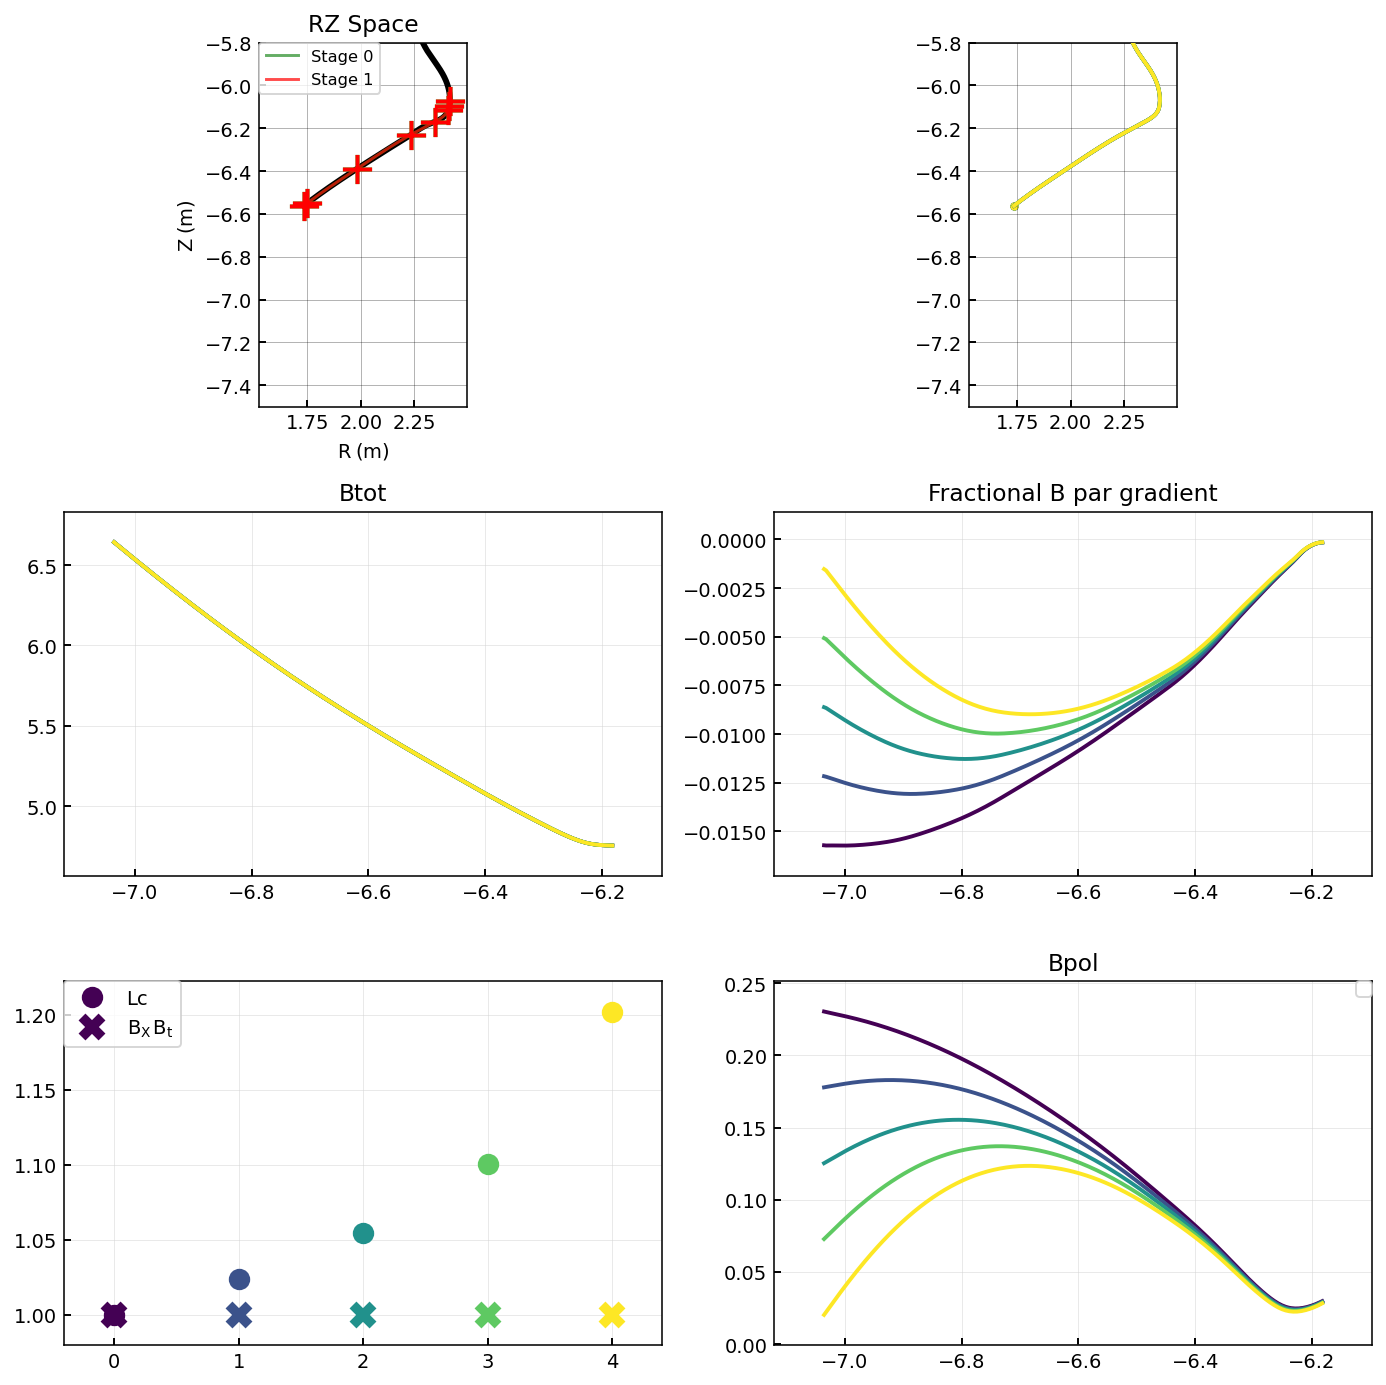

In [7]:
plt.close("all")
d = eqb["SPR45"]["il"]
base = Profile(d["R"], d["Z"], d["Xpoint"], d["Btot"], d["Bpol"], d["S"], d["Spol"])
base_offsets = [
    {"pos" : 1},
    {"pos" : 0.97},
    {"pos" : 0.95},
    {"pos" : 0.85},
    {"pos" : 0.7},
    {"pos" : 0.35},
    {"pos" : 0.02},
    {"pos" : 0.0},
    ]

offsets_stage1 = [
    {"pos" : 1,     "offsety": 0},
    {"pos" : 0.97,  "offsety": 0},
    {"pos" : 0.95,  "offsety": 0},
    {"pos" : 0.85,  "offsety": 0, "offsetx": 0},
    {"pos" : 0.7,   "offsety": 0, "offsetx": 0},
    {"pos" : 0.35,  "offsety": 0, "offsetx": 0},
    {"pos" : 0.02,  "offsety": 0, "offsetx": 0},
    {"pos" : 0.0,   "offsety": 0, "offsetx": 0},
    ]


# Make stage 0 by copying the base profile
stage0 = base.copy()
stage0.offset_control_points(base_offsets)
stage0.name = "Stage 0"

# Make stage 1 by offsetting stage 0
stage1 = base.copy()
stage1.offset_control_points(offsets_stage1)
stage1.recalculate_topology()
stage1.name = "Stage 1"

profiles = {}
Bpol_gauss_height = [0, 0.1, 0.2, 0.3, 0.4]
for idx, i in enumerate(np.linspace(0,1,5)):
    profiles[i] = base.copy()
    profiles[i].offset_control_points(offsets_stage1, factor = i)
    profiles[i].recalculate_topology(Bpol_shift = dict(width = 0.4, pos = -0.5, height = Bpol_gauss_height[idx]*0.525))
    profiles[i].name = i
    
plot_profiles(base, [stage0, stage1], profiles, ylims=(-7.5, -5.8), reverse_S = False)

allprofiles["poloidal_flux_expansion"] = copy.deepcopy(profiles)

## Run 4: move in and down to outer level

In [43]:
%matplotlib inline

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


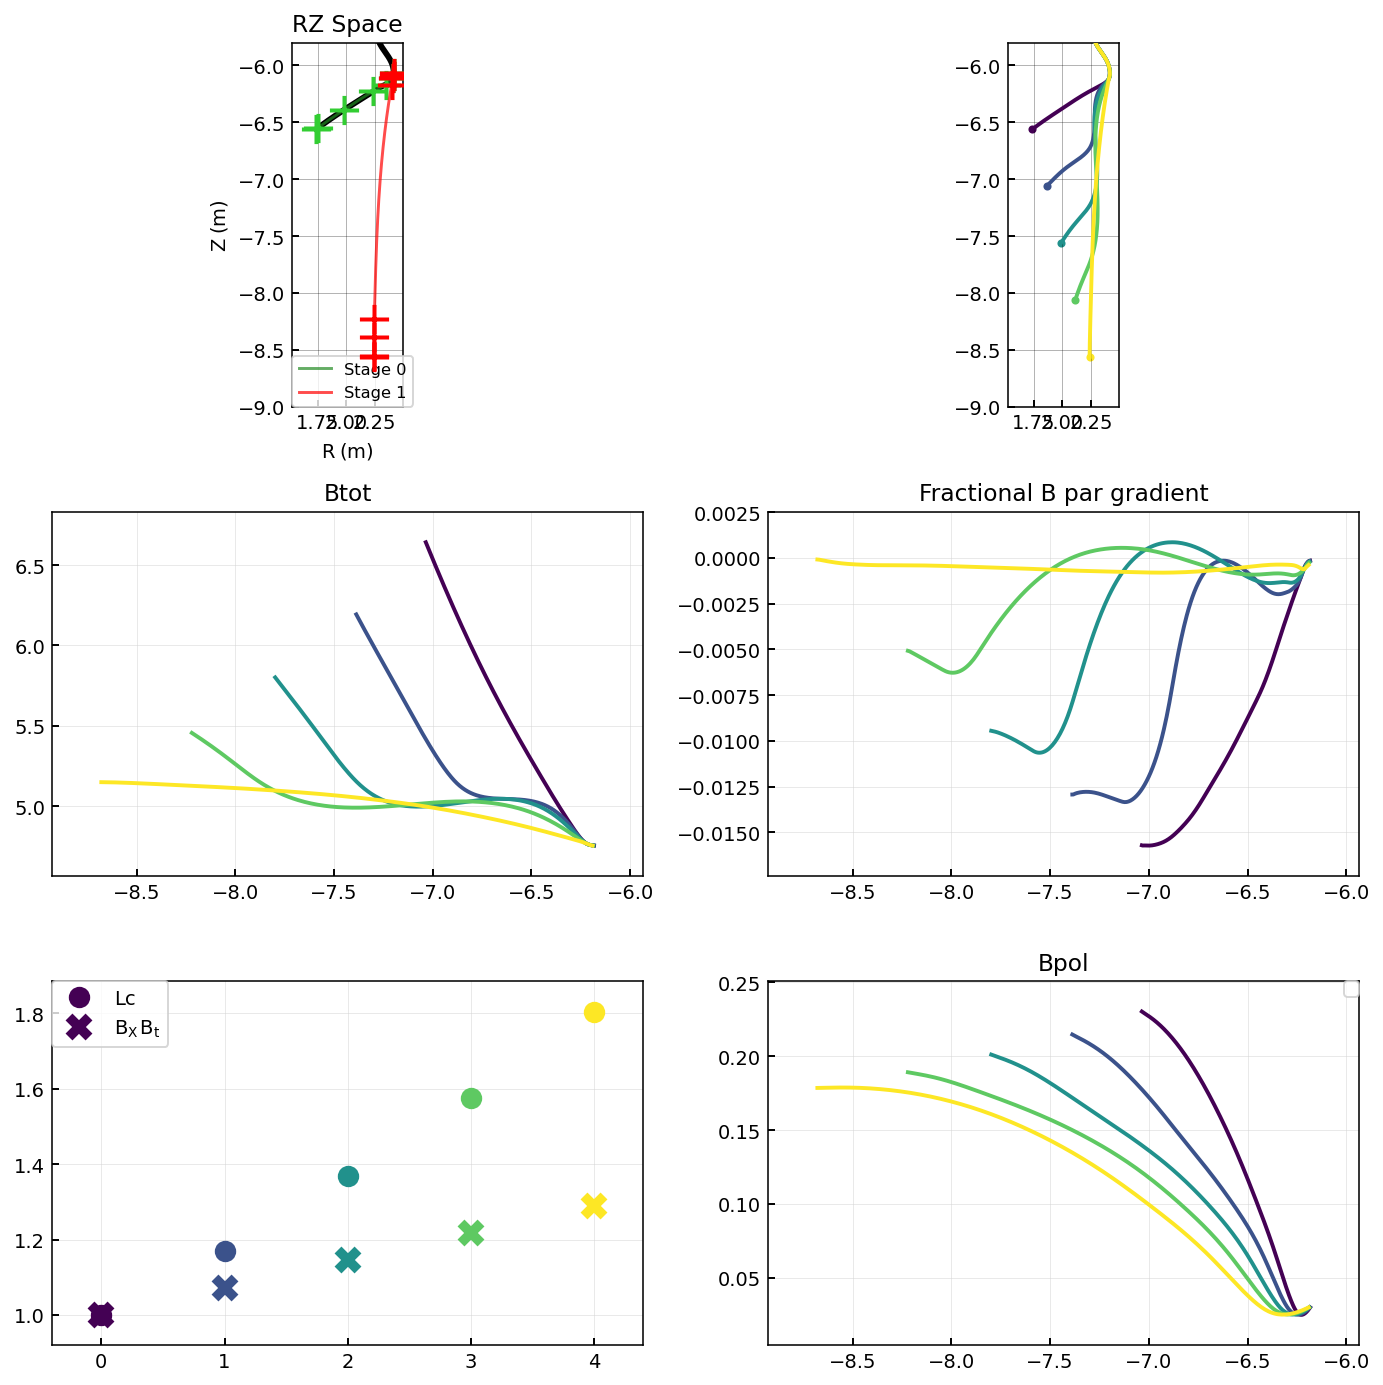

In [8]:
plt.close("all")
d = eqb["SPR45"]["il"]
base = Profile(d["R"], d["Z"], d["Xpoint"], d["Btot"], d["Bpol"], d["S"], d["Spol"])
base_offsets = [
    {"pos" : 1},
    {"pos" : 0.97},
    {"pos" : 0.95},
    {"pos" : 0.85},
    {"pos" : 0.7},
    {"pos" : 0.35},
    {"pos" : 0.02},
    {"pos" : 0.0},
    ]

offsets_stage1 = [
    {"pos" : 1,     "offsety": 0},
    {"pos" : 0.97,  "offsety": 0},
    {"pos" : 0.95,  "offsety": 0},
    {"pos" : 0.85,  "offsety": 0, "offsetx": 0.05},
    {"pos" : 0.7,   "offsety": -2, "offsetx": 0.01},
    {"pos" : 0.35,  "offsety": -2, "offsetx": 0.260},
    {"pos" : 0.02,  "offsety": -2, "offsetx": 0.490},
    {"pos" : 0.0,   "offsety": -2, "offsetx": 0.5035},
    ]


# Make stage 0 by copying the base profile
stage0 = base.copy()
stage0.offset_control_points(base_offsets)
stage0.name = "Stage 0"

# Make stage 1 by offsetting stage 0
stage1 = base.copy()
stage1.offset_control_points(offsets_stage1)
stage1.recalculate_topology()
stage1.name = "Stage 1"

profiles = {}
for i in np.linspace(0,1,5):
    profiles[i] = base.copy()
    profiles[i].offset_control_points(offsets_stage1, factor = i)
    profiles[i].recalculate_topology()
    profiles[i].name = i
    
plot_profiles(base, [stage0, stage1], profiles, ylims=(-9, -5.8), reverse_S = False)

# fig, ax = plt.subplots(figsize = (16,10),dpi = 120)
# colors = [plt.cm.get_cmap("viridis", 5)(x) for x in range(5)]


# for side in "ol", "il":
#     d = eqb["SPR45"][side]
#     ax.plot(d["R"], d["Z"], lw = 3, c = "k")
# ax.plot(base.R, base.Z, lw = 3, c = "k")
# for i, stage in enumerate([stage0, stage1]):
#     if i > 0:
#         kwargs = dict(markersettings = {"c" : "r"}, linesettings = {"c" : "r"})
#     else:
#         kwargs = {}
#     stage.plot_control_points(ax = ax, **kwargs)
# ax.set_ylim(-9, -6)
# ax.set_ylim(-8.6, -8)
# ax.set_xlim(2,2.5)


allprofiles["move_in_down"] = copy.deepcopy(profiles)

# Run DLS

## Prepare inputs

In [149]:
# results = dict()

#set switches
radios_default = {
    "ionisation": False,  # WIP - do not use. in development
    "upstreamGrid": True, # SET TRUE if including domain above xpoint. if true, source of divertor heat flux comes from radial transport upstream, and Tu is at the midplane. If false, heat flux simply enters at the x point as qi, and Tu is located at the x point. 
    "fluxlim": False,  # WIP - do not use. if true, turns on a flux limiter with coefficient alpha
}

#set general run parameters
constants_default = {
    "gamma_sheath": 7, #sheath transmittion coefficient for virtual target. Choice does not matter if Tt is low
    "Tt": 0.5, # requested virtual target temp for calculating heat flux at detachment front. Aim for low (sub 1eV) Tt
    
    "qpllu0": 1.5e9, # heat flux density at the x point
    "nu0" : 0.4e20, # Upstream density (if constant)
    "cz0" : 0.1, # Impurity fraction (if constant)
    
    "Lfunc": LfuncKallenbach("Ar"), # impurity cooling function. More are available in AnalyticCoolingCurves.py
    "alpha": 1000, # WIP - do not use. flux limiting alpha. Only matters if fluxlim is true
}


constants = constants_default.copy() # Set settings to default
radios = radios_default.copy() # Set settings to default
constants["qpllu0"] = 1.5e9

## Setup allstores dict

In [73]:
allstores = {}

## Run 1: farther strike point

In [75]:
cvar = "power"
design = "SPR45"
side = "il"
study = "move_in"

allstores[study] = {}

for i in profiles:
    print(i)
    d = allprofiles[study][i].copy()
    SpolRange = np.linspace(0, d["Spol"][d["Xpoint"]], 20) # 
    SparRange = [d["S"][np.argmin(np.abs(d["Spol"] - SpolRange[x]))] for x, _ in enumerate(SpolRange)]

    try: 
        results = LRBv21(constants, radios, d, 
            SparRange, 
            verbosity = 0, control_variable = cvar, 
            Ctol = 1e-3, Ttol=1e-3,
            dynamicGrid = True,
            dynamicGridRefinementRatio = 10,
            zero_qpllt = True)
    
    except KeyboardInterrupt:
        print("Stopped")
        sys.exit(0)
    
    allstores[study][i] = copy.deepcopy(results)

0.0
Solving...0.00...1.31...2.62...3.93...5.26...6.51...7.91...9.35...10.86...12.45...14.00...15.81...17.79...19.98...22.46...25.50...29.82...35.58...43.30...51.54...Complete in 40.8 seconds
0.25
Solving...0.00...1.16...2.31...3.47...4.64...5.75...6.97...8.24...9.57...10.97...12.34...13.93...15.68...17.61...19.82...22.52...25.97...31.30...38.67...45.38...Complete in 45.2 seconds
0.5
Solving...0.00...1.01...2.03...3.04...4.00...5.04...6.12...7.23...8.40...9.62...10.82...12.22...13.75...15.46...17.40...19.78...22.80...27.40...33.89...39.78...Complete in 43.0 seconds
0.75
Solving...0.00...0.89...1.79...2.68...3.52...4.44...5.39...6.37...7.39...8.47...9.52...10.75...12.11...13.61...15.34...17.44...20.08...24.08...29.82...35.00...Complete in 44.8 seconds
1.0
Solving...0.00...0.80...1.61...2.41...3.17...4.00...4.85...5.73...6.65...7.62...8.57...9.67...10.89...12.25...13.81...15.70...18.05...21.64...26.81...31.48...Complete in 41.4 seconds


## Run 2: lower strike point

In [77]:
cvar = "power"
design = "SPR45"
side = "il"
study = "move_down"

allstores[study] = {}

for i in profiles:
    print(i)
    d = allprofiles[study][i].copy()
    SpolRange = np.linspace(0, d["Spol"][d["Xpoint"]], 20) # 
    SparRange = [d["S"][np.argmin(np.abs(d["Spol"] - SpolRange[x]))] for x, _ in enumerate(SpolRange)]

    try: 
        results = LRBv21(constants, radios, d, 
            SparRange, 
            verbosity = 0, control_variable = cvar, 
            Ctol = 1e-3, Ttol=1e-3,
            dynamicGrid = True,
            dynamicGridRefinementRatio = 10,
            zero_qpllt = True)
    
    except KeyboardInterrupt:
        print("Stopped")
        sys.exit(0)
    
    allstores[study][i] = copy.deepcopy(results)

0.0
Solving...0.00...1.31...2.62...3.93...5.26...6.51...7.91...9.35...10.86...12.45...14.00...15.81...17.79...19.98...22.46...25.50...29.82...35.58...43.30...51.54...Complete in 49.8 seconds
0.25
Solving...0.00...1.44...2.88...4.33...5.68...7.17...8.70...10.29...11.94...13.68...15.38...17.37...19.55...21.98...24.75...28.12...32.40...39.00...47.55...56.62...Complete in 62.1 seconds
0.5
Solving...0.00...1.59...3.19...4.79...6.29...7.94...9.63...11.38...13.20...15.12...17.01...19.20...21.61...24.31...27.39...31.13...35.83...43.03...53.30...62.55...Complete in 45.5 seconds
0.75
Solving...0.00...1.76...3.52...5.29...6.95...8.78...10.65...12.59...14.60...16.72...18.79...21.22...23.88...26.86...30.27...34.41...39.58...47.48...58.84...69.05...Complete in 48.9 seconds
1.0
Solving...0.00...1.94...3.87...5.82...7.65...9.67...11.74...13.87...16.09...18.23...20.70...23.36...26.29...29.57...33.33...37.89...43.56...52.23...64.72...75.96...Complete in 56.8 seconds


## Run 3: Add poloidal flux expansion

In [148]:
constants

<function hermes3.utils.constants(name)>

In [150]:
cvar = "power"
design = "SPR45"
side = "il"
study = "poloidal_flux_expansion"

allstores[study] = {}

for i in profiles:
    print(i)
    d = allprofiles[study][i].copy()
    SpolRange = np.linspace(0, d["Spol"][d["Xpoint"]], 20) # 
    SparRange = [d["S"][np.argmin(np.abs(d["Spol"] - SpolRange[x]))] for x, _ in enumerate(SpolRange)]

    try: 
        results = LRBv21(constants, radios, d, 
            SparRange, 
            verbosity = 0, control_variable = cvar, 
            Ctol = 1e-3, Ttol=1e-3,
            dynamicGrid = True,
            dynamicGridRefinementRatio = 10,
            zero_qpllt = True)
    
    except KeyboardInterrupt:
        print("Stopped")
        sys.exit(0)
    
    allstores[study][i] = copy.deepcopy(results)

0.0
Solving...0.00...1.31...2.62...3.93...5.26...6.51...7.91...9.35...10.86...12.45...14.00...15.81...17.79...19.98...22.46...25.50...29.82...35.58...43.30...51.54...Complete in 48.0 seconds
0.25
Solving...0.00...1.66...3.27...4.84...6.38...7.80...9.35...10.93...12.56...14.25...15.89...17.78...19.83...22.10...24.65...27.77...32.18...38.08...45.99...54.37...Complete in 40.0 seconds
0.5
Solving...0.00...2.28...4.37...6.31...8.15...9.79...11.54...13.29...15.05...16.86...18.60...20.58...22.71...25.04...27.67...30.86...35.38...41.43...49.54...58.06...Complete in 46.1 seconds
0.75
Solving...0.00...3.64...6.61...

## Run 4: move in and down to outer level

In [ ]:
cvar = "power"
design = "SPR45"
side = "il"
study = "move_in_down"

allstores[study] = {}

for i in profiles:
    print(i)
    d = allprofiles[study][i].copy()
    SpolRange = np.linspace(0, d["Spol"][d["Xpoint"]], 20) # 
    SparRange = [d["S"][np.argmin(np.abs(d["Spol"] - SpolRange[x]))] for x, _ in enumerate(SpolRange)]

    try: 
        results = LRBv21(constants, radios, d, 
            SparRange, 
            verbosity = 0, control_variable = cvar, 
            Ctol = 1e-3, Ttol=1e-3,
            dynamicGrid = True,
            dynamicGridRefinementRatio = 10,
            zero_qpllt = True)
    
    except KeyboardInterrupt:
        print("Stopped")
        sys.exit(0)
    
    allstores[study][i] = copy.deepcopy(results)

0.0
Solving...0.00...2.72...5.47...8.45...11.58...15.10...19.28...24.98...34.51...51.54...Complete in 19.9 seconds
0.25
Solving...0.00...3.92...7.82...11.81...16.29...21.18...27.31...35.12...48.45...72.40...Complete in 18.8 seconds
0.5
Solving...0.00...5.27...10.47...15.86...21.92...28.68...36.52...47.12...64.89...96.70...Complete in 25.1 seconds
0.75
Solving...0.00...6.46...13.21...20.01...27.50...35.74...45.93...59.03...81.75...122.02...Complete in 25.9 seconds
1.0
Solving...0.00...7.96...16.02...24.42...33.48...44.08...56.39...72.61...100.24...150.11...Complete in 26.5 seconds


In [ ]:
write_file(allstores, "2024-03-16- Inner examples for ppt .pkl")

2024-03-14 - Outer examples for ppt.pkl written


In [19]:
allstores = read_file("2024-03-16- Inner examples for ppt .pkl")

2024-03-16- Inner examples for ppt .pkl loaded


# Postprocess designs

In [ ]:
allprofiles.keys()

dict_keys(['move_in', 'move_down', 'poloidal_flux_expansion', 'move_in_down'])

C:\Users\mikek\AppData\Local\Temp\ipykernel_27896\2352069049.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap('viridis', 5)


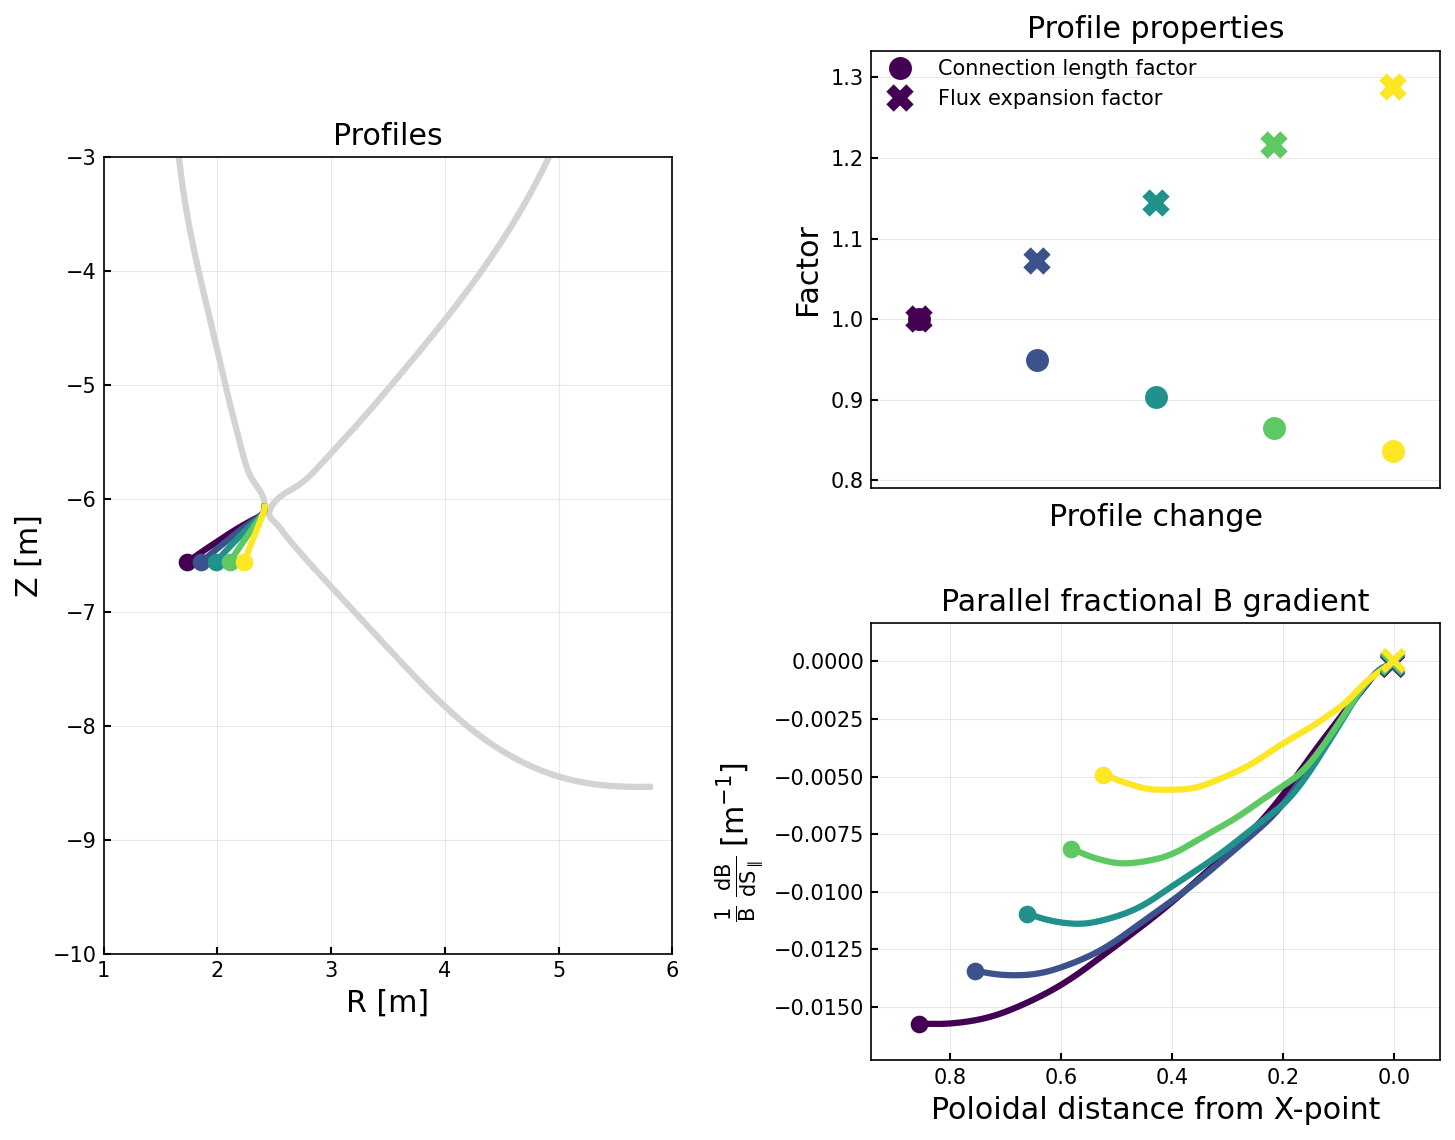

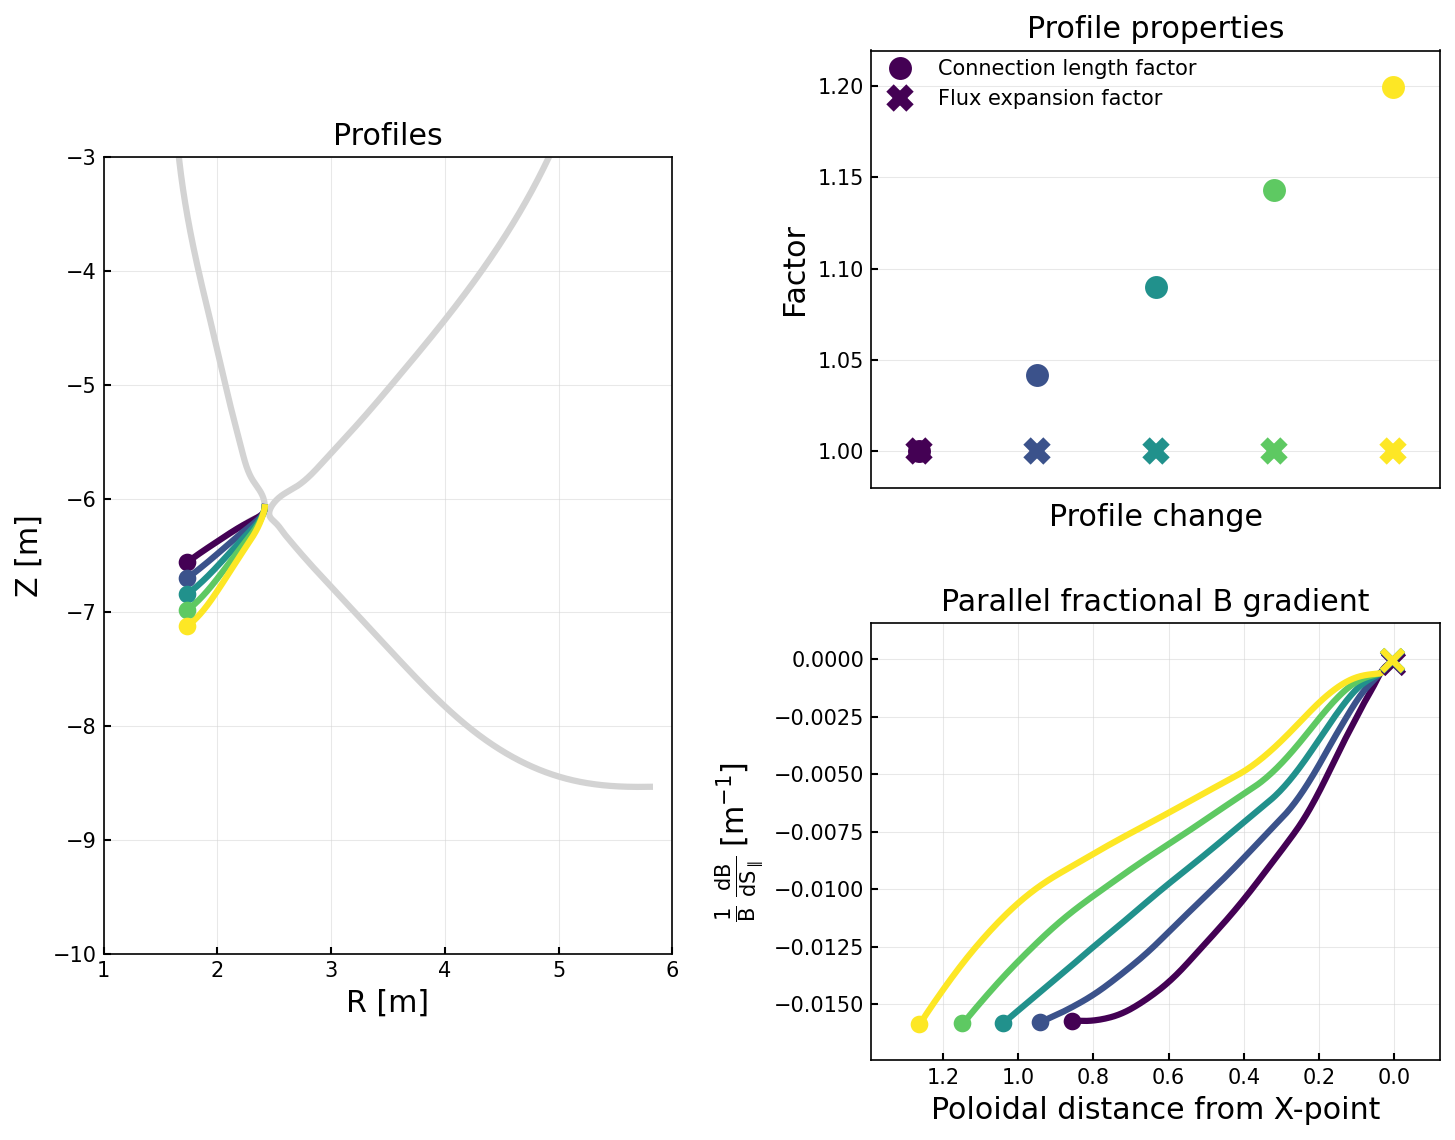

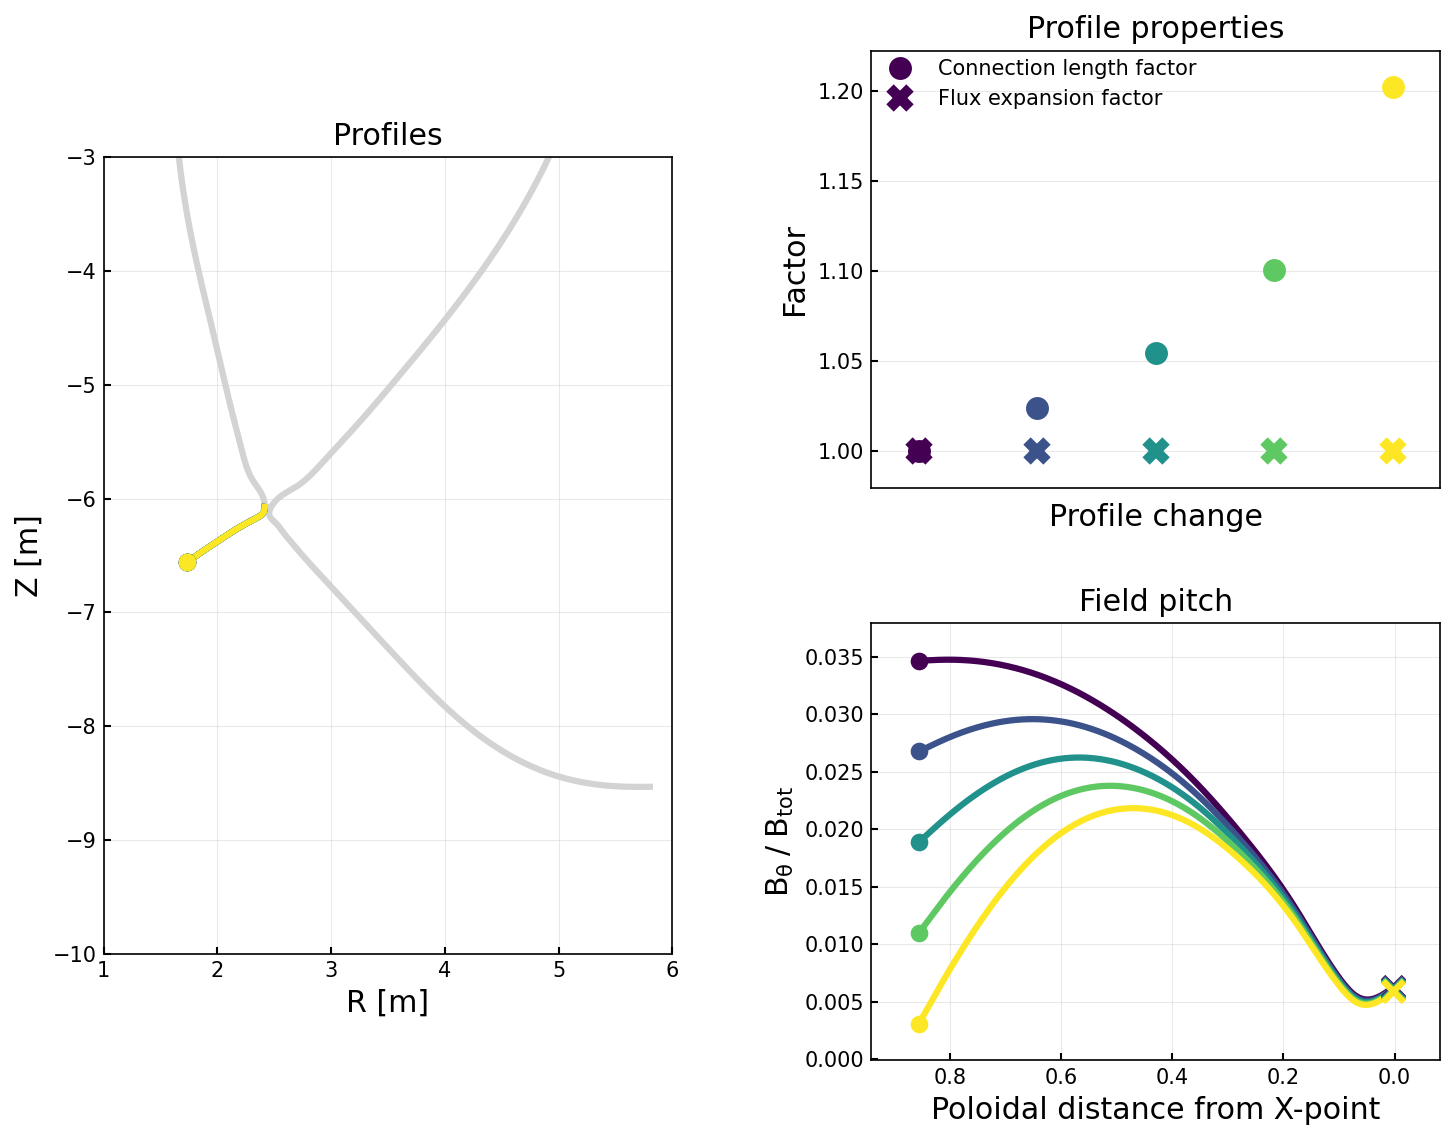

In [17]:
cmap = mpl.cm.get_cmap('viridis', 5)
colors = [cmap(x) for x in np.linspace(0,1, 5)]

xlims = (1,6)
ylims = (-10,-3)
plot_all = False
plot_simple = True

plotter = {}
plotter["move_in"] = plotProfiles(allprofiles["move_in"], basis = "Spol", side = "inner", colors = colors)
plotter["move_in"].gridplot(["Btot", "Btotgrad"], eqb["SPR45"], designs_ylims = ylims, designs_xlims = xlims, plot_all = plot_all, plot_simple = plot_simple)

plotter["move_down"] = plotProfiles(allprofiles["move_down"], basis = "Spol", side = "inner", colors = colors)
plotter["move_down"].gridplot(["Btot", "Btotgrad"], eqb["SPR45"], designs_ylims = ylims, designs_xlims = xlims, plot_all = plot_all)

plotter["poloidal_flux_expansion"] = plotProfiles(allprofiles["poloidal_flux_expansion"], basis = "Spol", side = "inner", colors = colors)
plotter["poloidal_flux_expansion"].gridplot(["Bpol", "Bpitch"], eqb["SPR45"],designs_ylims = ylims, designs_xlims = xlims, plot_all = plot_all)




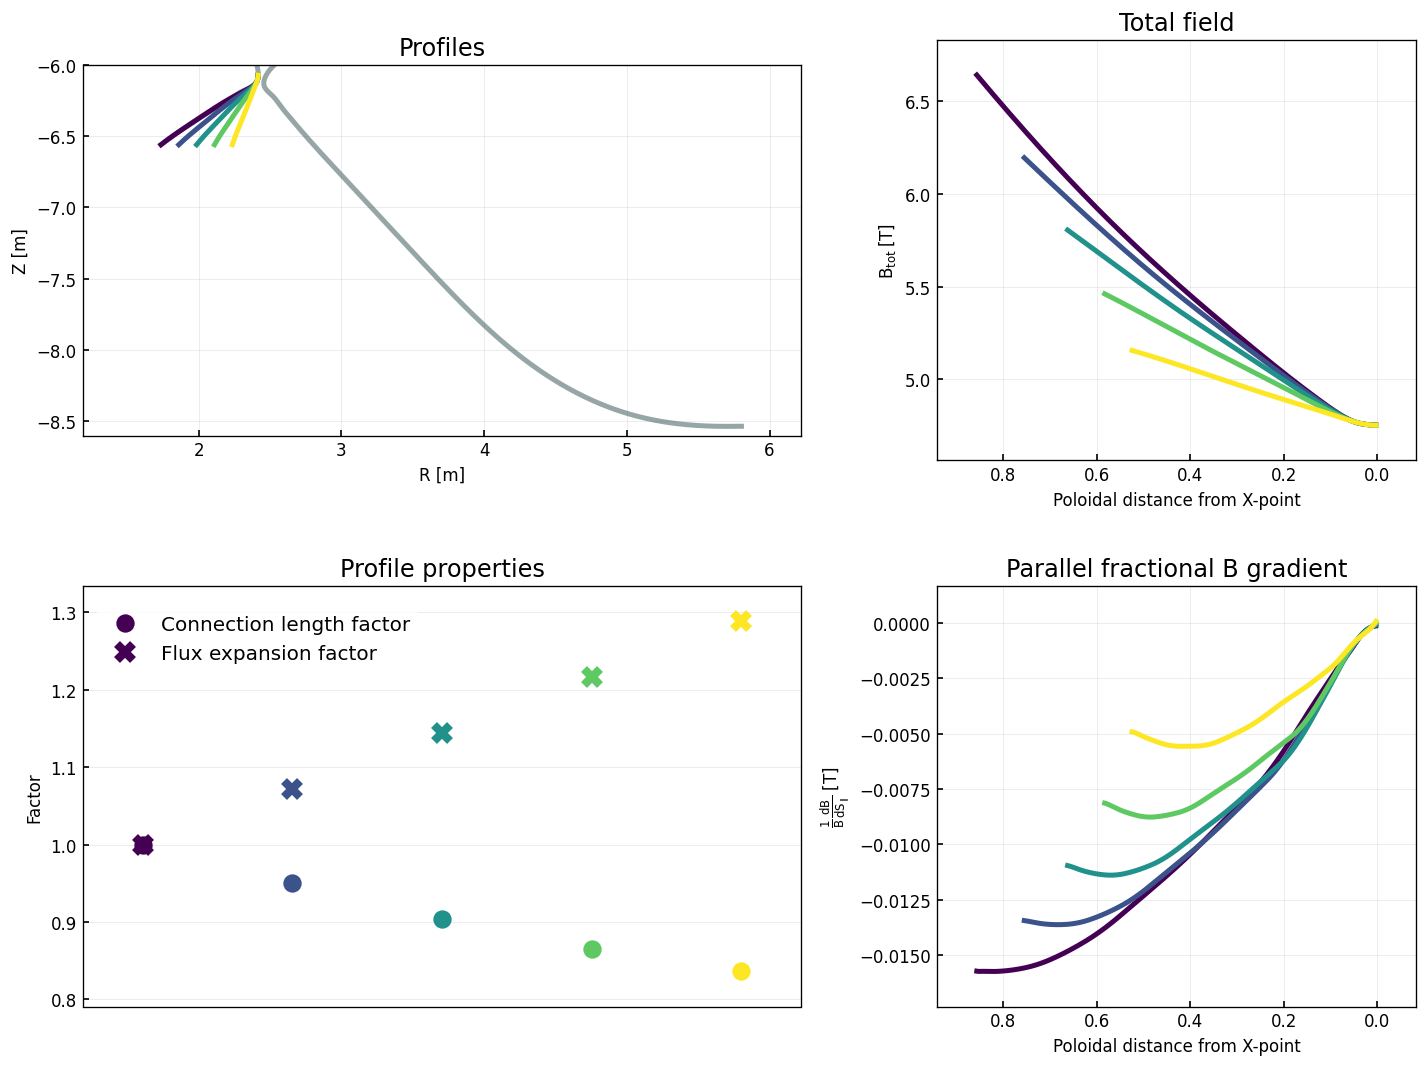

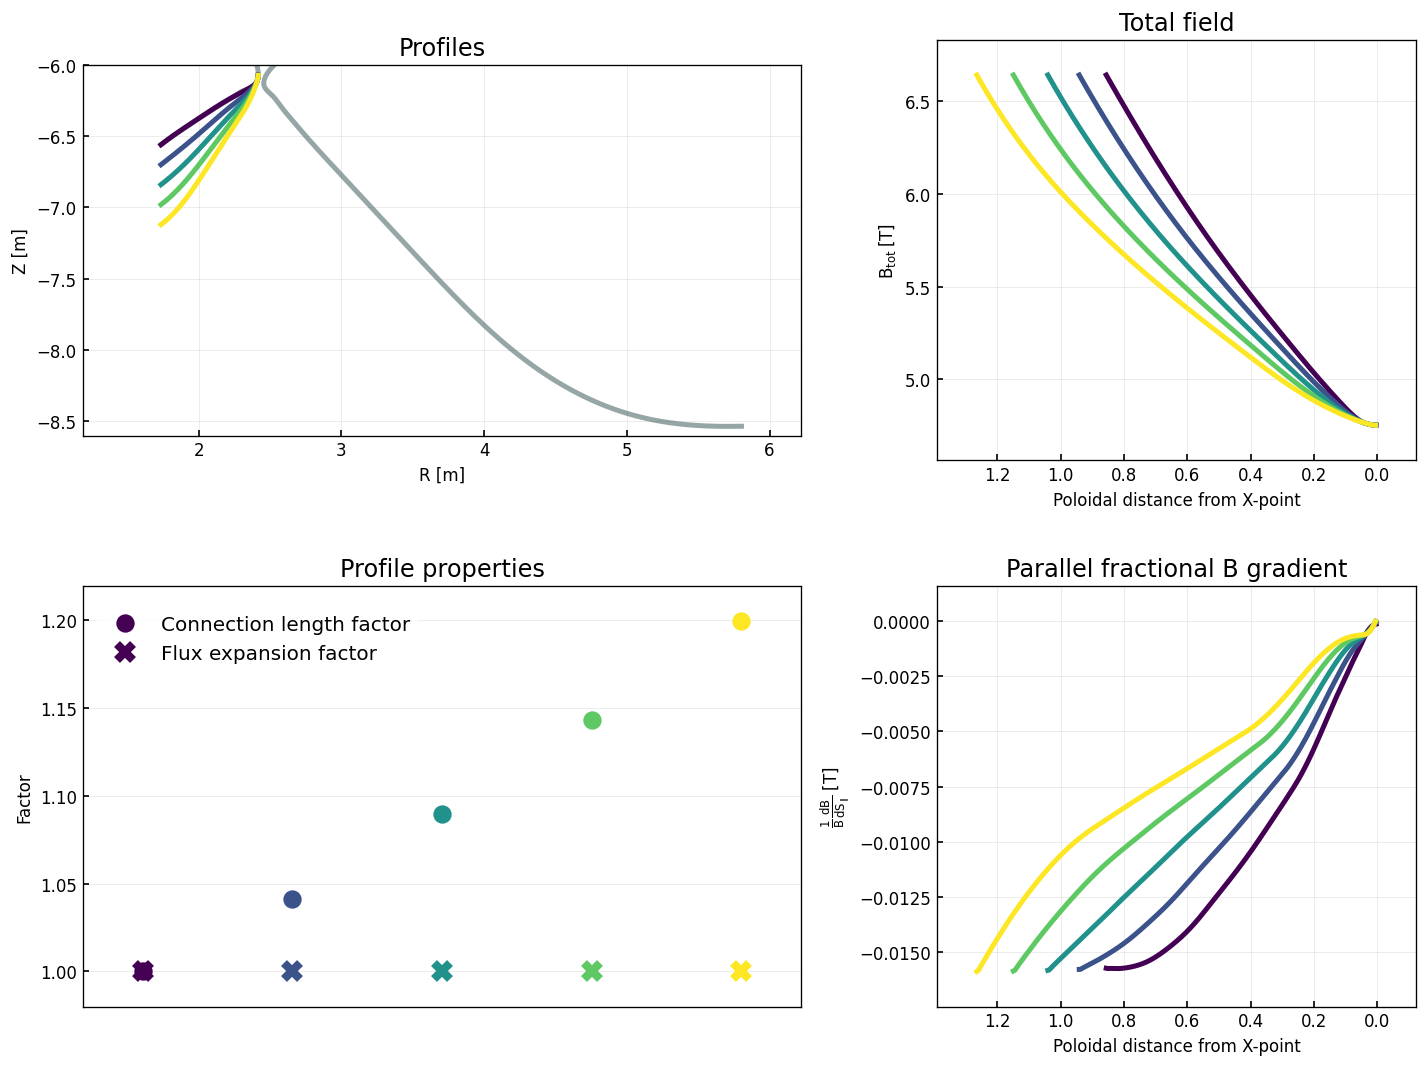

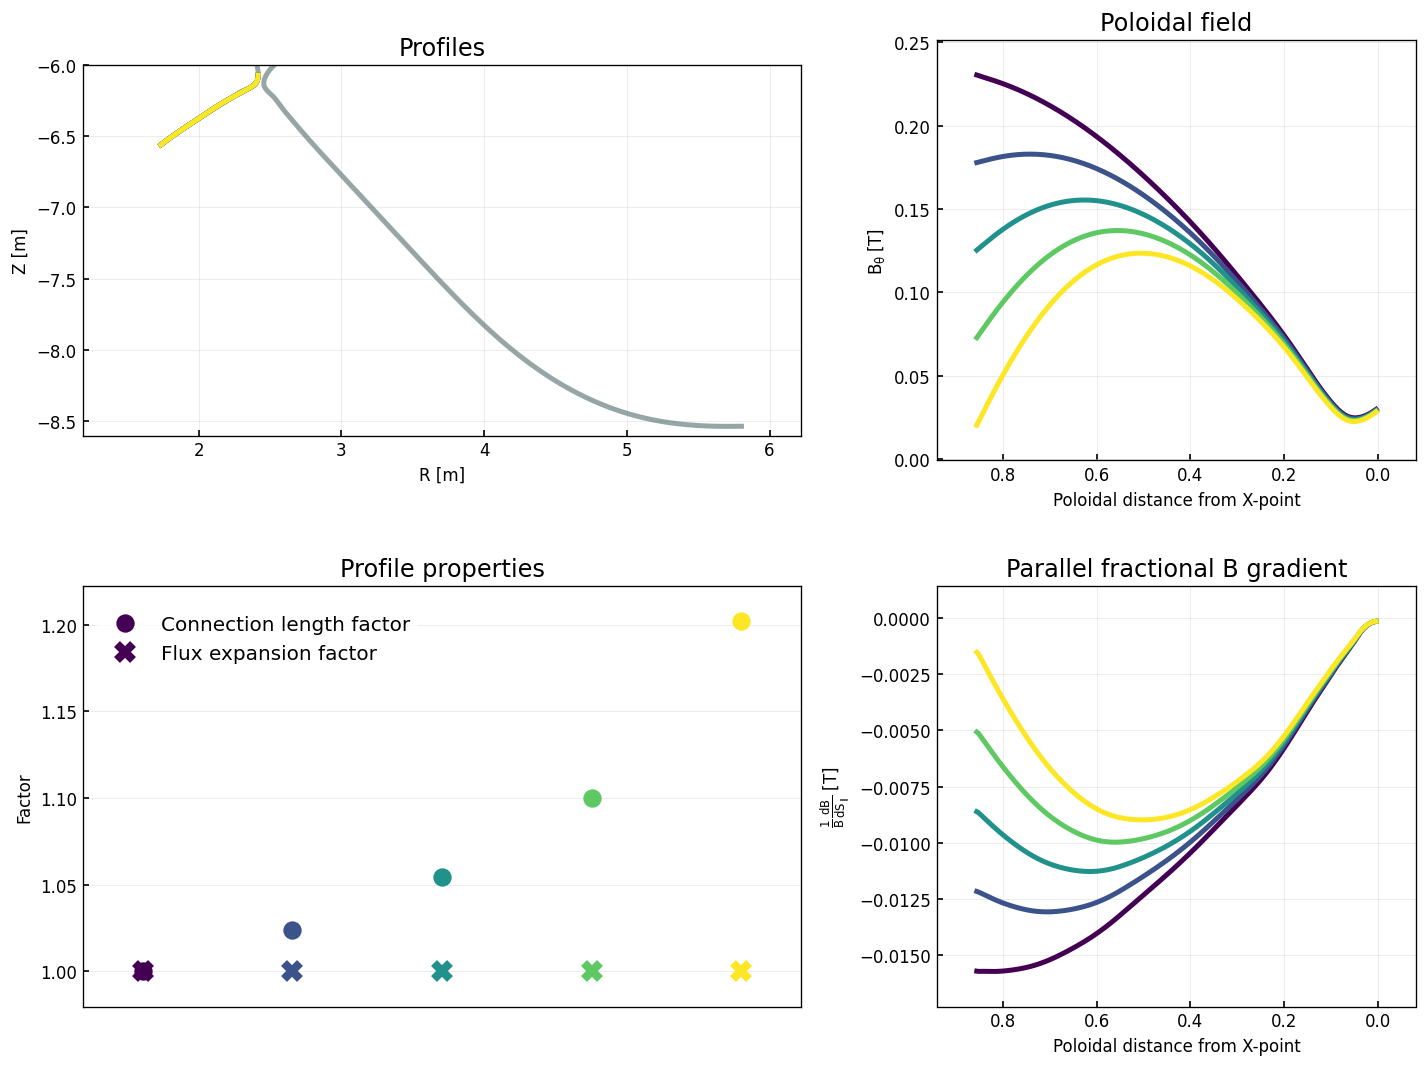

In [146]:
plotter = {}
plotter["move_in"] = plotProfiles(allprofiles["move_in"], basis = "Spol", side = "inner", colors = colors)
plotter["move_in"].gridplot(["Btot", "Btotgrad"], eqb["SPR45"])

plotter["move_down"] = plotProfiles(allprofiles["move_down"], basis = "Spol", side = "inner", colors = colors)
plotter["move_down"].gridplot(["Btot", "Btotgrad"], eqb["SPR45"])

plotter["poloidal_flux_expansion"] = plotProfiles(allprofiles["poloidal_flux_expansion"], basis = "Spol", side = "inner", colors = colors)
plotter["poloidal_flux_expansion"].gridplot(["Bpol", "Btotgrad"], eqb["SPR45"])

# Postprocess results

C:\Users\mikek\AppData\Local\Temp\ipykernel_27896\811856032.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap('viridis', 5)
c:\Users\mikek\OneDrive\Project\python-packages\sdtools\DLS\postprocess.py:814: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


move_in
move_down
poloidal_flux_expansion
move_in_down


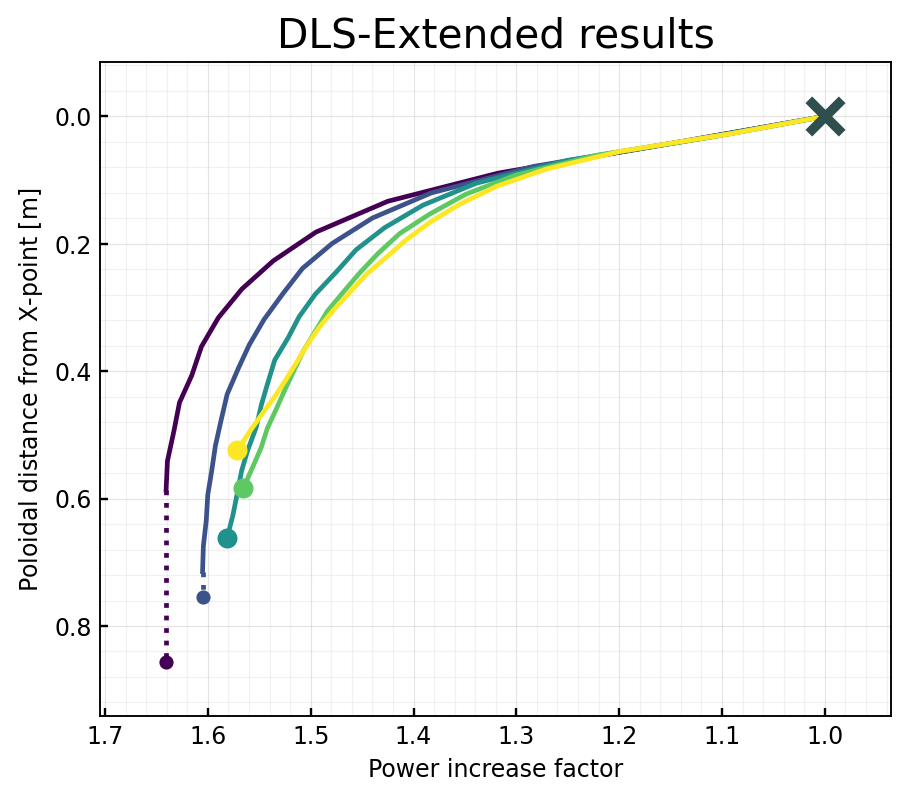

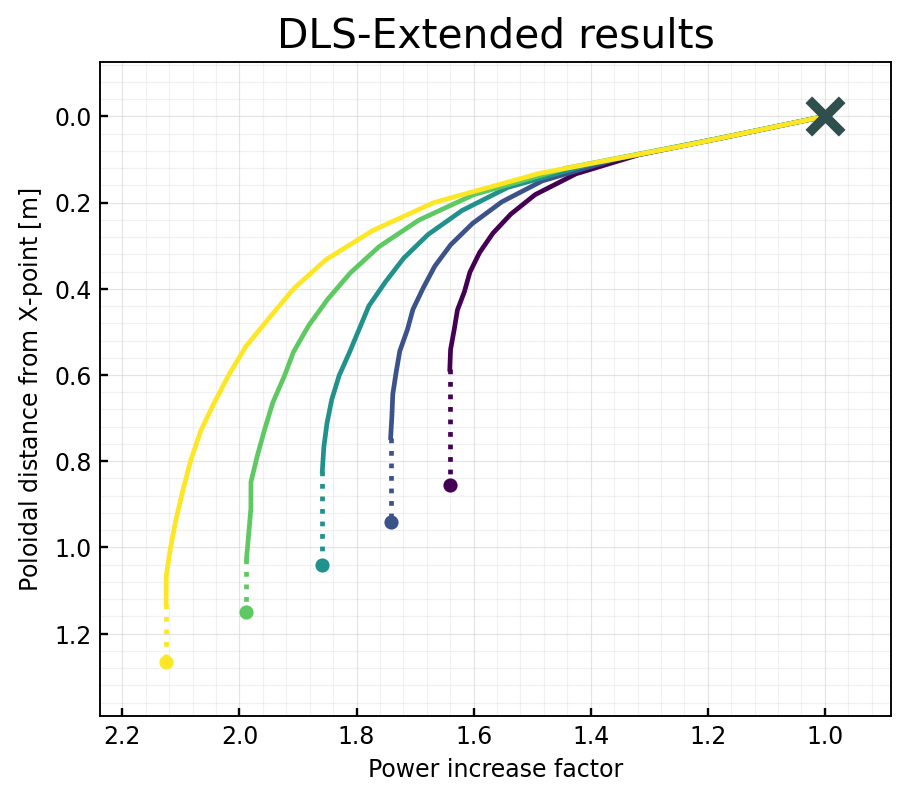

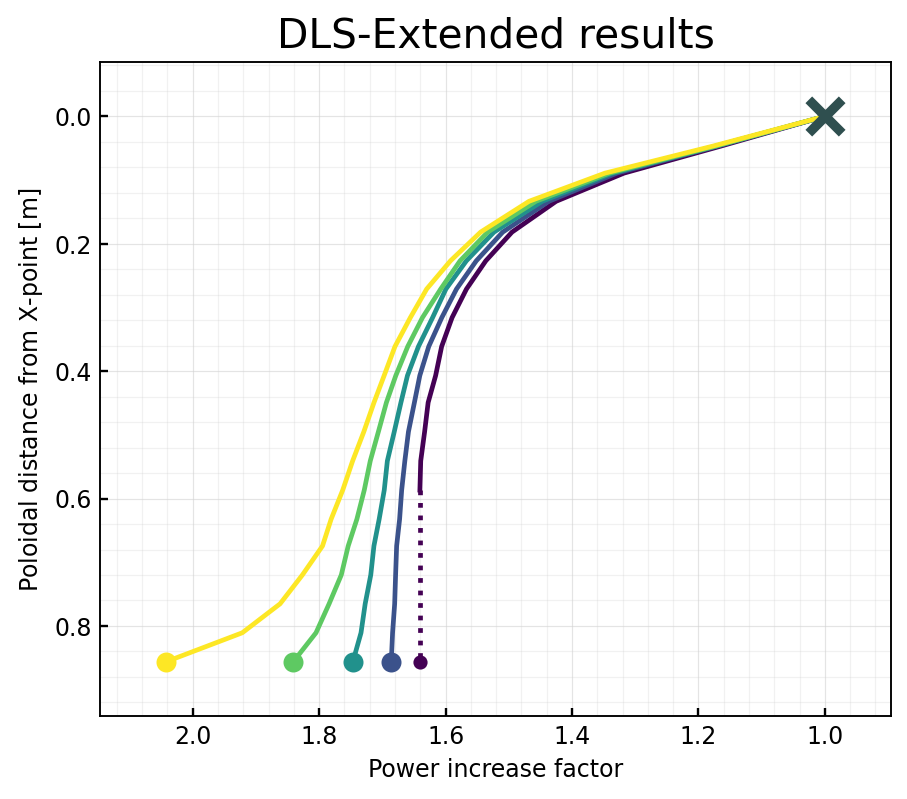

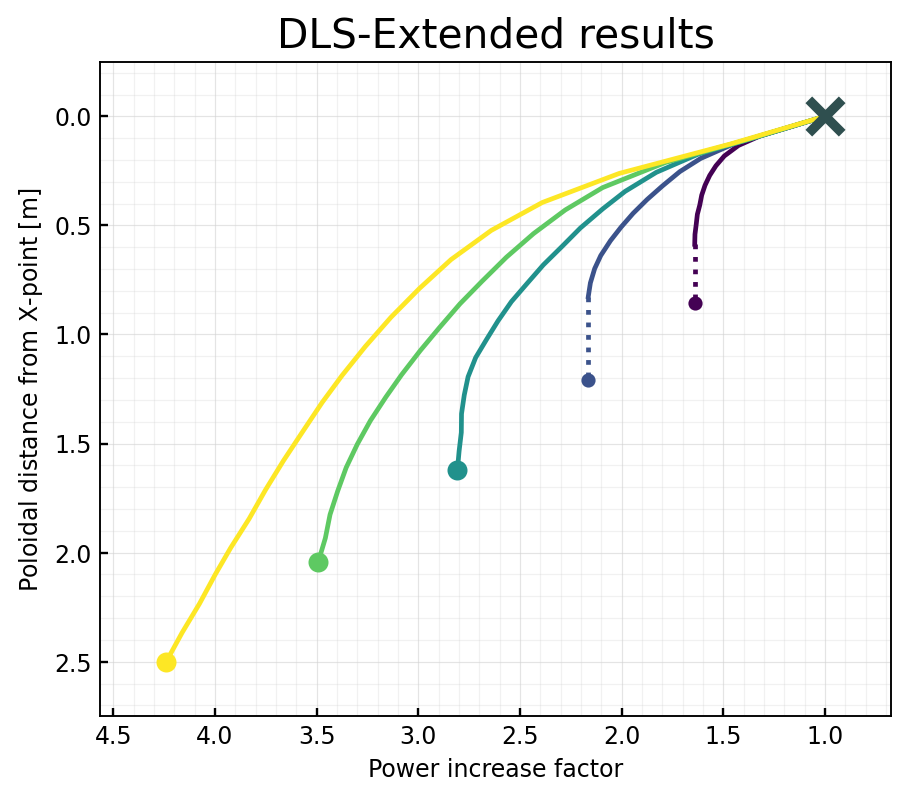

In [20]:

cmap = mpl.cm.get_cmap('viridis', 5)
colors = [cmap(x) for x in np.linspace(0,1, len(profiles))]

for key in allstores:
    stores = allstores[key]
    print(key)
    plot_results(stores, mode = "inner", colors = colors)

C:\Users\mikek\AppData\Local\Temp\ipykernel_6428\2168952451.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap('viridis', 5)
C:\Users\mikek\AppData\Local\Temp\ipykernel_6428\2168952451.py:49: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


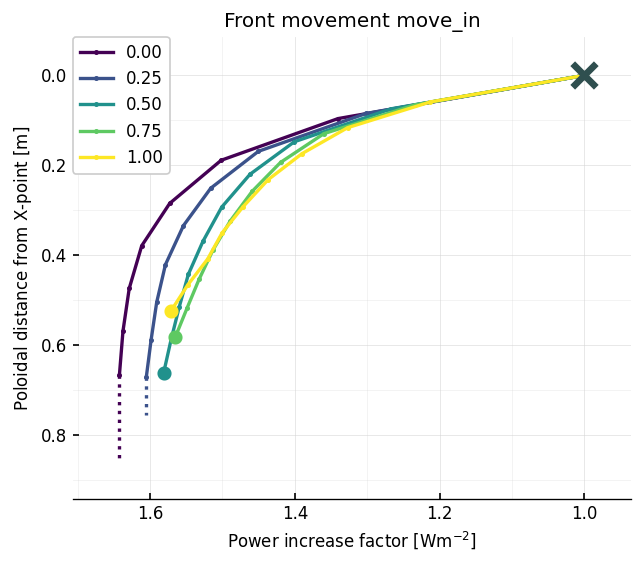

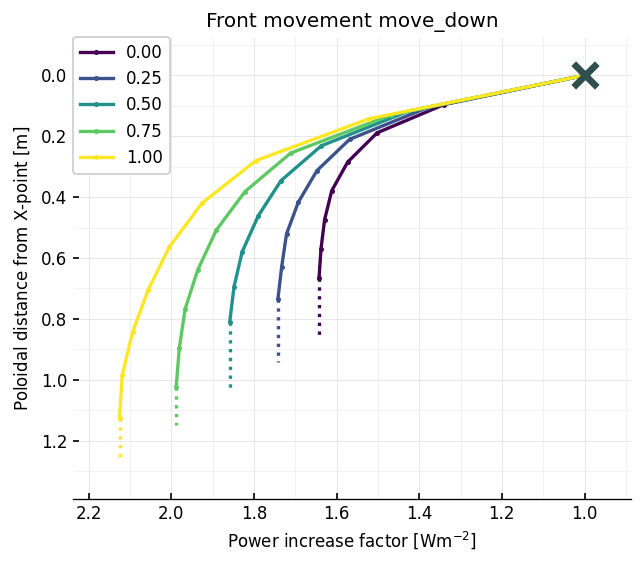

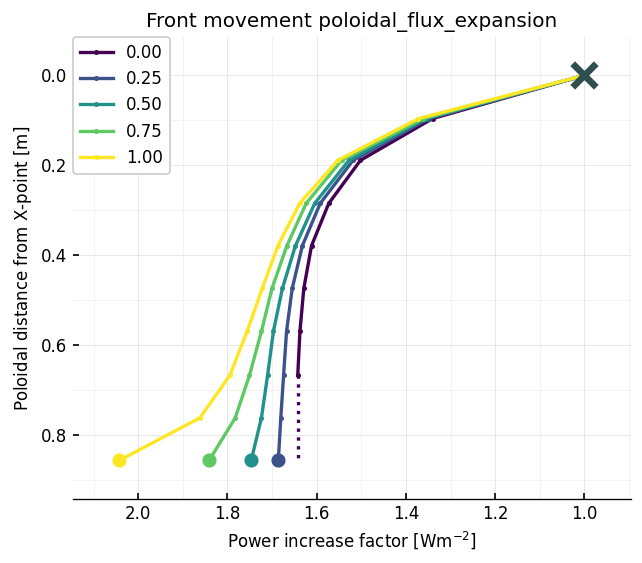

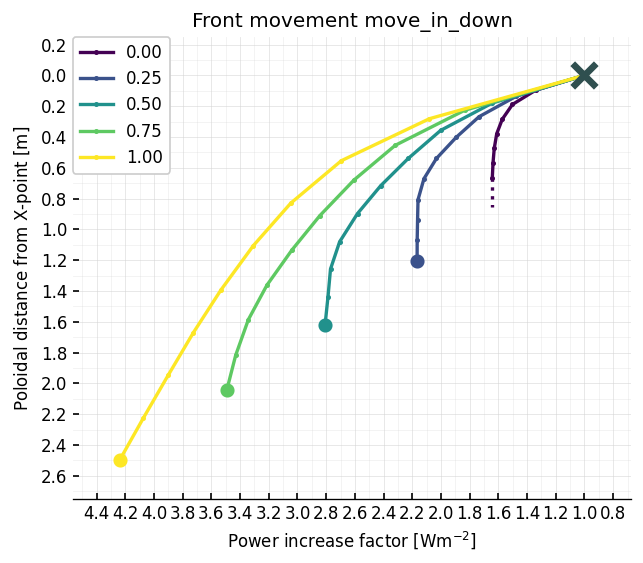

In [195]:
for study in allstores:
    store = allstores[study]
    
    fig, ax = plt.subplots()
    style = dict(lw = 2, ms = 2)

    cmap = mpl.cm.get_cmap('viridis', 5)
    colors = [cmap(x) for x in np.linspace(0,1, len(profiles))]
    
    for i, id in enumerate(store):
        s = store[id]
        x = s["cvar_trim"] / s["cvar_trim"][-1]
        cchoice = "cvar"
        # x = s[f"{cchoice}_trim"]
        y = s["SpolPlot"] - s["SpolPlot"][-1]
        ax.plot(x, y, label = f"{id:.2f}", color = colors[i], **style, marker = "o")
        
        if i == 0: ax.scatter(x[-1], y[-1], color = "darkslategrey", marker = "x", linewidths = 4, s = 200, zorder = 10)
        ax.scatter(x[0], y[0], color = colors[i], marker = "o", linewidths = 4, s = 20, zorder = 10)
        
        if np.isnan(x).any():
            
            pointx = x[~np.isnan(x)][0]
            ax.plot([pointx, pointx], [y[np.where(x == pointx)[0][0]], y.min()], color = colors[i], linestyle = ":", linewidth = 2)
            
        
    # Xaxis major, minor
    ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(0.2))
    ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.1))
    # Yaxis major, minor
    ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.2))
    ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.1))
    
    def custom_formatter(x, pos):
        if x < 0:
            return f'{-x:.1f}'  # Multiply by -1 and format to 2 decimal places
        else:
            return f'{x:.1f}'
    
    ax.yaxis.set_major_formatter(custom_formatter)
    
    ax.grid(which = "major", visible = True,   alpha = 0.6)
    ax.grid(which = "minor", visible = True,  alpha = 0.3)
    ax.set_xlim(ax.get_xlim()[::-1])
    ax.legend()
    ax.set_xlabel("Power increase factor $[Wm^{-2}]$")
    ax.set_ylabel("Poloidal distance from X-point $[m]$")
    ax.set_title(f"Front movement {study}")
    fig.show()
    # store2.keys()

In [66]:
1.75 / 1.2

1.4583333333333335

In [65]:
1.75 * 1.2

2.1

In [25]:
allstores.keys()

dict_keys([])

In [298]:
key = 1
s  = store_farther_strike[key]
p = profiles_farther_strike[key]
i = 0

Spol = s["Spolprofiles"][i]
S = s["Sprofiles"][i]
Btot = s["Btotprofiles"][i]
Bpol = s["Bpolprofiles"][i]
Xpoint = s["Xpoints"][i]

T = s["Tprofiles"][i]
q = s["Qprofiles"][i]
P = T[-1] * s["state"].nu
N = P/T
R = s["Rprofiles"][i]   # W/m3

st = s["state"]
cvar = s["cvar"][i]
st.qradial

qr_calc = q[Xpoint] / Btot[Xpoint] / np.trapz(1/Btot[Xpoint:], x = S[Xpoint:])
qr_calc = cvar / Btot[Xpoint] / np.trapz(1/Btot[Xpoint:], x = S[Xpoint:])

print(f"qpar at xpoint:  {q[Xpoint]:.2e} W/m2")
print(f"cvar:            {cvar:.2e} W/m2")
print(f"qradial in code: {st.qradial:.2e} W/m2")
print(f"qradial in calc: {qr_calc:.2e} W/m2")

qpar at xpoint:  1.04e+09 W/m2
cvar:            1.33e+09 W/m2
qradial in code: 2.01e+07 W/m2
qradial in calc: 2.01e+07 W/m2


In [215]:
s["cvar"]

array([6.44958938e+09, 2.56543284e+09, 1.44107307e+09, 9.27044032e+08,
       6.04967038e+08])

C:\Users\mikek\AppData\Local\Temp\ipykernel_32280\3979861533.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = [plt.cm.get_cmap("viridis", len(s["Spolprofiles"]))(x) for x in range(len(s["Spolprofiles"]))]


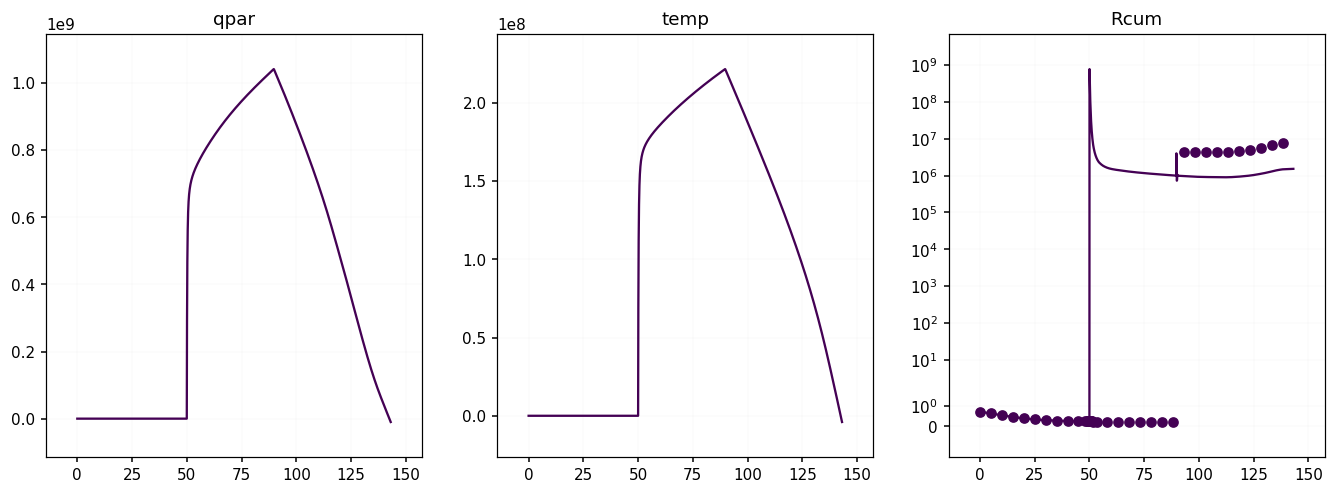

In [299]:
key = 1
s  = store_farther_strike[key]
p = profiles_farther_strike[key]

i = -1


fig, axes = plt.subplots(1,3,figsize=(15,5))

colors = [plt.cm.get_cmap("viridis", len(s["Spolprofiles"]))(x) for x in range(len(s["Spolprofiles"]))]

for i, _ in enumerate(s["Spolprofiles"]):
    i=0
    Spol = s["Spolprofiles"][i]
    S = s["Sprofiles"][i]
    Btot = s["Btotprofiles"][i]
    Bpol = s["Bpolprofiles"][i]
    Xpoint = s["Xpoints"][i]
    
    T = s["Tprofiles"][i]
    q = s["Qprofiles"][i]
    P = T[-1] * s["state"].nu
    N = P/T
    R = s["Rprofiles"][i]   # W/m3
    
    Rcum = sp.integrate.cumulative_trapezoid(y = R, x = S, initial = 0)
    Rcum /= Rcum.max()
    
    Prad = np.gradient(q/Btot, S)   
            
    if s["radios"]["upstreamGrid"] is True:
        # qradial is the uniform upstream heat source
        qradial = np.ones_like(S)
        qradial[Xpoint:] = s["state"].qradial
        Prad += qradial/Btot 
    
    Pradcum = sp.integrate.cumulative_trapezoid(y = Prad, x = S, initial = 0)
    Pradcum /= np.nanmax(Pradcum)

    ax = axes[0]
    ax.plot(S, q, color = colors[i])
    ax.set_title("qpar")
    
    ax = axes[1]
    # ax.plot(S, T, color = colors[i])
    ax.plot(S, q/Btot, color = colors[i])
    ax.set_title("temp")
    
    ax = axes[2]
    ax.plot(S, Prad, color = colors[i])
    ax.plot(S[::50], qradial[::50]/Btot[::50], marker = "o", lw = 0, color = colors[i])
    # ax2 = ax.twinx()
    # ax2.plot(S, np.gradient(Rcum,S), color = colors[i], alpha = 0.3)
    ax.set_yscale("symlog")
    ax.set_title("Rcum")

# Convergence analysis

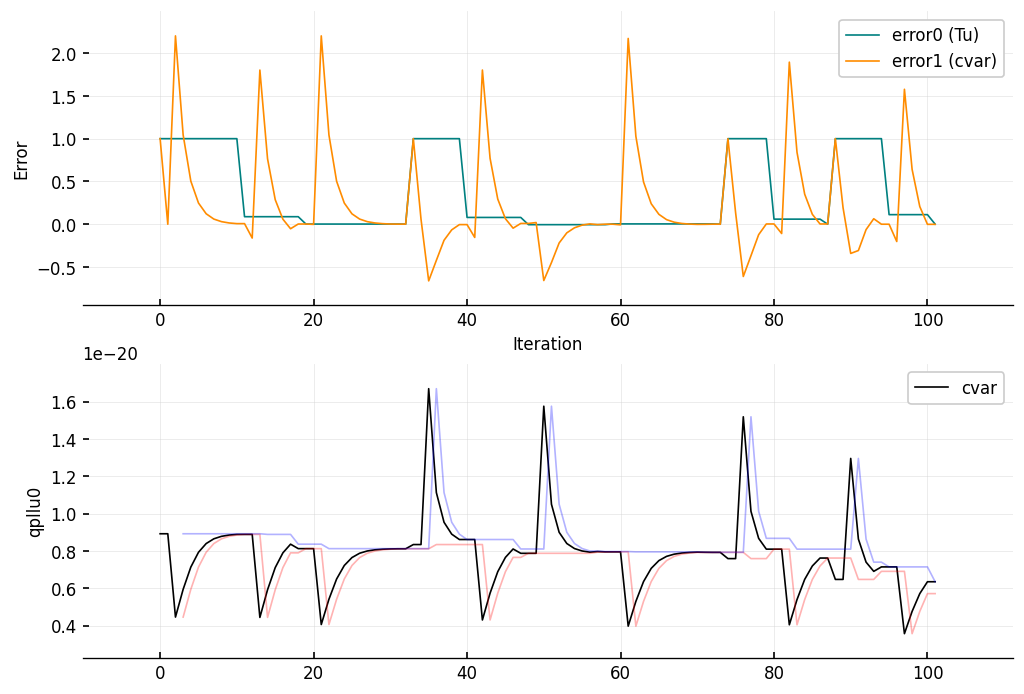

In [55]:


i = 1
logs = allstores["move_in"][i]["logs"]
Svars = list(logs.keys())
log = logs[Svars[0]]

error0 = np.array(log["error0"])
error1 = np.array(log["error1"])

if np.max(error1) > 1e2:
    error1[error1 > np.median(error1)*3] = np.nan

fig, axes = plt.subplots(2,1, figsize = (10,7))
ax = axes[0]
ax.plot(log["error0"], lw = 1,  label = "error0 (Tu)")
ax.plot(error1, lw = 1,  label = "error1 (cvar)")
ax.legend()
ax.set_xlabel("Iteration")
ax.set_ylabel("Error")

ax = axes[1]
ax.plot(1/np.array(log["cvar"]), color = "k", lw = 1, label = "cvar")
ax.plot(1/np.array(log["upper_bound"]), color = "red", ls = "-", alpha = 0.3, lw = 1)
ax.plot(1/np.array(log["lower_bound"]), color = "blue", ls = "-", alpha = 0.3, lw = 1)
ax.set_ylabel("qpllu0")
ax.legend()


In [ ]:
stores = store_farther_strike
profiles = profiles_farther_strike
for key in stores:
    p = profiles[key]
    s = stores[key]
    plot_profile_histories(p, s, [0,1,2,4], rad_threshold = 0.7, mode = "rad", title = f"Flux expansion = {key}")